# SF-quant Functions Demo

This notebook demos all new functions using `mom_zerobeta_weights.parquet`.

The demo is organized into three sections:
1. **Returns** - Portfolio returns calculation, summary tables, and charts
2. **Leverage** - Portfolio leverage calculation, summary tables, and charts
3. **Drawdowns** - Portfolio drawdown calculation, summary tables, and charts

## Setup

In [1]:
import polars as pl
import datetime as dt
import sf_quant.data as sfd
import sf_quant.performance as sfp
import sf_quant.research as sfr
import polars_ols as pls

In [2]:
# Load the weights data
weights = pl.read_parquet("/home/stiten/sf-quant/mom_zerobeta_weights.parquet")
print(f"Loaded weights shape: {weights.shape}")
print(f"Columns: {weights.columns}")
print(f"Date range: {weights['date'].min()} to {weights['date'].max()}")

Loaded weights shape: (14586306, 3)
Columns: ['date', 'barrid', 'weight']
Date range: 2000-12-29 to 2024-01-31


---
## 1. Returns

Test portfolio returns generation, summary statistics, and visualization.

### 1.1 Generate Single Portfolio Returns

In [3]:
returns = sfp.generate_returns_from_weights(weights)
returns.head()

date,return
date,f64
2000-12-29,-0.001106
2001-01-02,0.011518
2001-01-03,0.009015
2001-01-04,-0.002672
2001-01-05,-0.006342


### 1.2 Generate Multi-Portfolio Returns

In [4]:
multi_returns = sfp.generate_multi_returns_from_weights(weights)
multi_returns.head(10)

date,portfolio,return
date,str,f64
2000-12-29,"""active""",0.009464
2000-12-29,"""benchmark""",-0.01057
2000-12-29,"""total""",-0.001106
2001-01-02,"""active""",0.040077
2001-01-02,"""benchmark""",-0.028559
2001-01-02,"""total""",0.011518
2001-01-03,"""active""",-0.049819
2001-01-03,"""benchmark""",0.058834
2001-01-03,"""total""",0.009015


### 1.3 Returns Summary Table (Single Portfolio)

In [5]:
returns_summary = sfp.generate_returns_summary_table(returns)
returns_summary

Count,Mean Return (%),Volatility (%),Total Return (%),Sharpe
u32,f64,f64,f64,f64
5807,31.69,24.93,72034.27,1.27


### 1.4 Multi-Returns Summary Table (Wide Format)

In [6]:
multi_returns_summary_wide = sfp.generate_multi_returns_summary_table(multi_returns, wide=True)
multi_returns_summary_wide

Portfolio,Count,Mean Return (%),Volatility (%),Total Return (%),Sharpe
str,u32,f64,f64,f64,f64
"""Active""",5807,14.63,34.94,612.71,0.42
"""Benchmark""",5807,17.05,19.19,3221.89,0.89
"""Total""",5807,31.69,24.93,72034.27,1.27


### 1.5 Multi-Returns Summary Table (Long Format)

In [7]:
multi_returns_summary_long = sfp.generate_multi_returns_summary_table(multi_returns, wide=False)
multi_returns_summary_long

statistics,Active,Benchmark,Total
str,f64,f64,f64
"""Count""",5807.0,5807.0,5807.0
"""Mean Return (%)""",14.63,17.05,31.69
"""Volatility (%)""",34.94,19.19,24.93
"""Total Return (%)""",612.71,3221.89,72034.27
"""Sharpe""",0.42,0.89,1.27


### 1.6 Returns Chart (Single Portfolio)

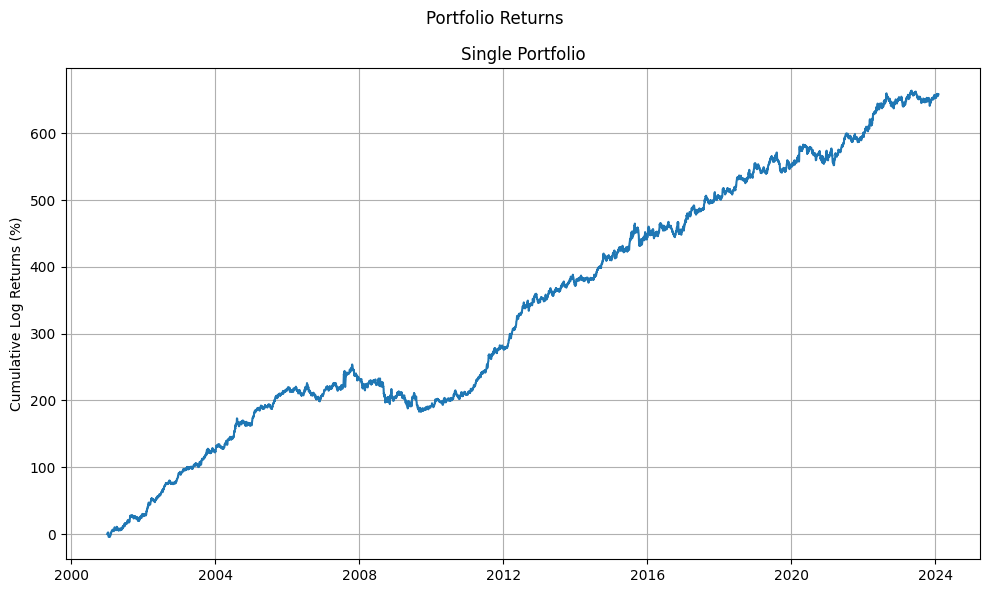

In [8]:
sfp.generate_returns_chart(
    returns,
    title="Portfolio Returns",
    subtitle="Single Portfolio",
    log_scale=True
)

### 1.7 Multi-Returns Chart

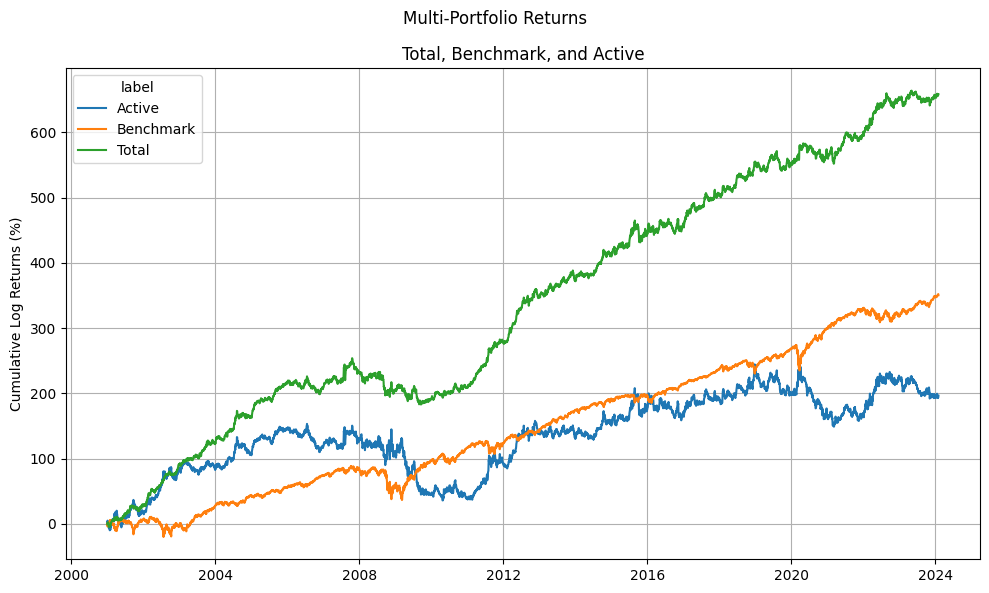

In [9]:
sfp.generate_multi_returns_chart(
    multi_returns,
    title="Multi-Portfolio Returns",
    subtitle="Total, Benchmark, and Active",
    log_scale=True
)

---
## 2. Leverage

Test portfolio leverage generation, summary statistics, and visualization.

### 2.1 Generate Leverage

In [10]:
leverage = sfp.generate_leverage_from_weights(weights)
leverage.head()

date,leverage
date,f64
2000-12-29,7.44
2001-01-02,7.29
2001-01-03,7.14
2001-01-04,7.29
2001-01-05,7.3


### 2.2 Leverage Summary Table

In [11]:
leverage_summary = sfp.generate_leverage_summary_table(leverage)
leverage_summary

Count,Mean Leverage,Min Leverage,Max Leverage,Std Leverage
u32,f64,f64,f64,f64
5807,15.84,6.82,22.62,3.68


### 2.3 Leverage Chart

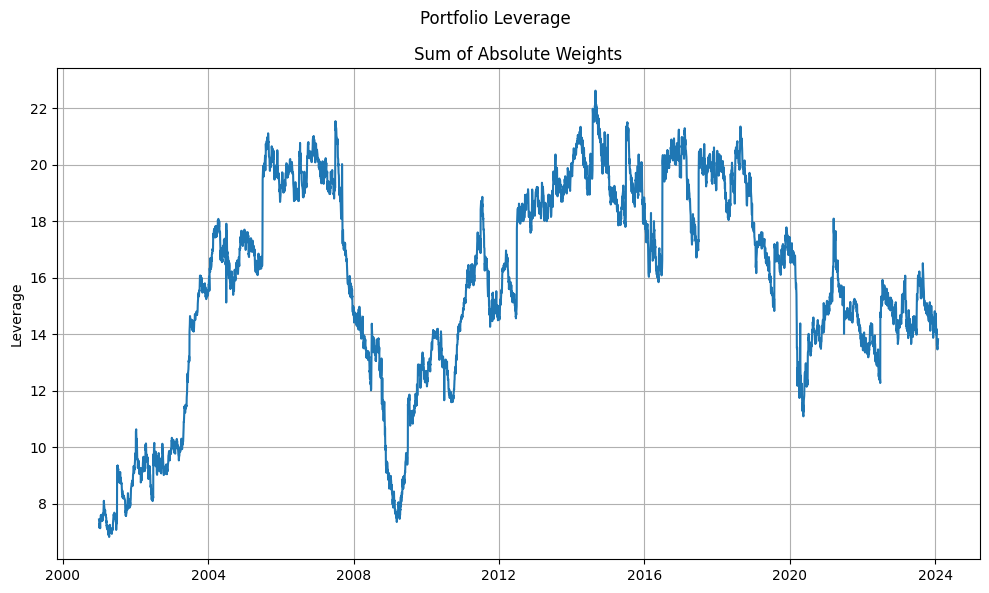

In [12]:
sfp.generate_leverage_chart(
    leverage,
    title="Portfolio Leverage",
    subtitle="Sum of Absolute Weights"
)

---
## 3. Drawdowns

Test portfolio drawdown generation, summary statistics, and visualization.

### 3.1 Generate Drawdown

In [13]:
drawdown = sfp.generate_drawdown_from_returns(returns)
drawdown.head()

date,drawdown
date,f64
2000-12-29,0.0
2001-01-02,0.0
2001-01-03,0.0
2001-01-04,-0.002672
2001-01-05,-0.008998


### 3.2 Drawdown Summary Table

In [14]:
drawdown_summary = sfp.generate_drawdown_summary_table(drawdown)
drawdown_summary

Count,Mean Drawdown (%),Max Drawdown (%),Current Drawdown (%),Longest Drawdown (days)
u32,f64,f64,f64,i32
5807,-10.53,-50.87,-5.45,941


### 3.3 Drawdown Chart

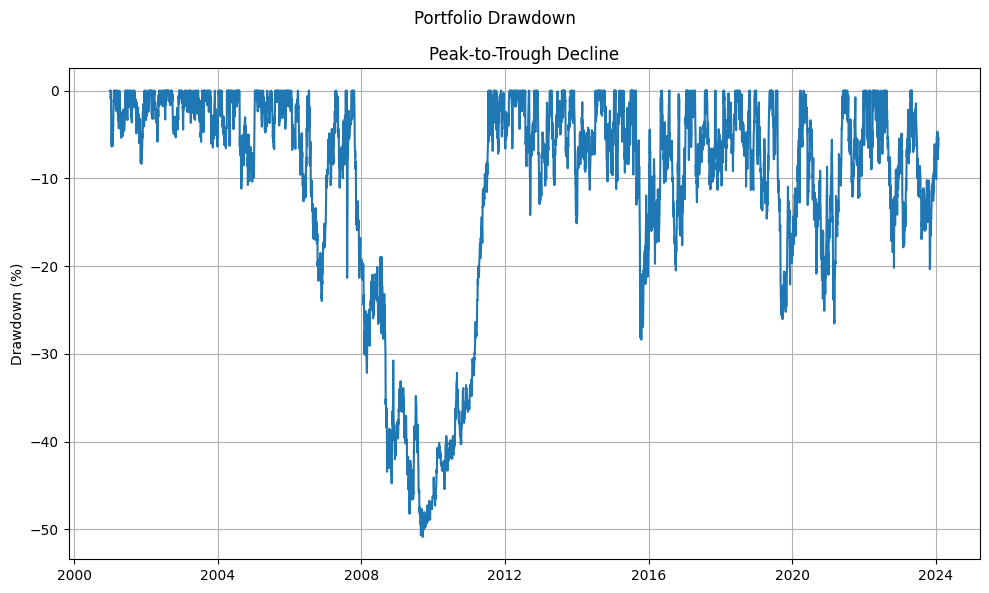

In [15]:
sfp.generate_drawdown_chart(
    drawdown,
    title="Portfolio Drawdown",
    subtitle="Peak-to-Trough Decline"
)

---
## 4. Information Coefficients

Test information coefficient generation and visualization.

In [16]:
alphas = (pl.read_parquet("/home/stiten/sf-quant/momentum.parquet")
    .select(['date', 'barrid', 'alpha'])
    .rename({'alpha': 'alpha'})
)
alphas

date,barrid,alpha
date,str,f64
2014-07-30,"""USA06Z1""",0.000477
2014-07-31,"""USA06Z1""",0.000061
2014-08-01,"""USA06Z1""",0.003824
2014-08-04,"""USA06Z1""",0.003398
2014-08-05,"""USA06Z1""",0.001571
…,…,…
2024-01-29,"""USBONP1""",0.018278
2024-01-30,"""USBONP1""",0.017538
2024-01-31,"""USBONP1""",0.017955


In [17]:
start = alphas["date"].min()
end = alphas["date"].max()

columns = [
    'date',
    'barrid',
    'return',
]

rets = (
    sfd.load_assets(
    start=start,
    end=end,
    in_universe=True,
    columns=columns
)
    .select(['date', 'barrid', 'return'])
    .with_columns(pl.col('return').truediv(100))
    .with_columns(pl.col('return').shift(-1).over('barrid').alias('fwd_return'))
)


In [18]:
ics = sfp.generate_alpha_ics(alphas, rets)
ics

date,ic,n
date,f64,u32
2008-01-17,-0.170682,2450
2023-02-15,0.160149,2500
2006-12-20,0.073501,2602
2009-06-24,-0.167165,2235
2013-10-16,0.047252,2599
…,…,…
2014-02-18,0.082524,2618
2020-08-06,-0.246578,2582
2008-10-02,0.185874,2454


<class 'polars.dataframe.frame.DataFrame'>


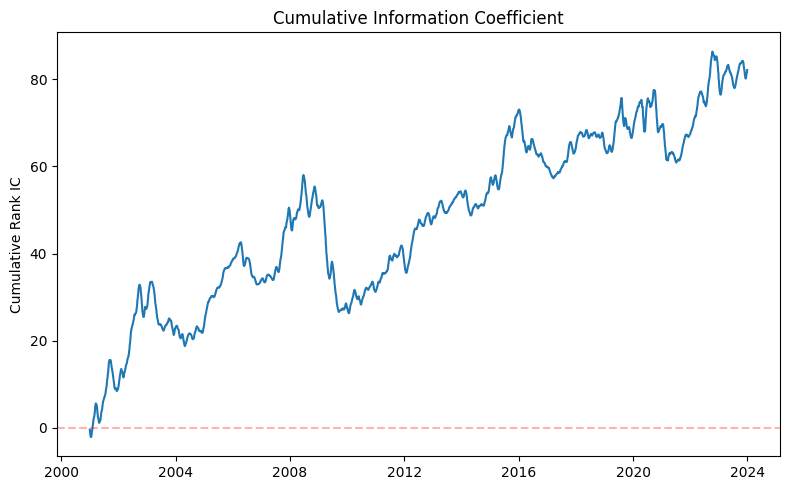

In [19]:
print(type(ics))
sfp.generate_ic_chart(ics)

---
## 5. Fama French Data loader and flow

In [20]:
columns = sfd.get_fama_french_columns()

all_data = sfd.load_fama_french(
    start=dt.date(1900, 1, 1),
    end=dt.date(2099, 12, 31)
)
print(columns)
print(f"  Start: {all_data['date'].min()}")
print(f"  End:   {all_data['date'].max()}")

shape: (7, 2)
┌────────┬─────────┐
│ column ┆ dtype   │
│ ---    ┆ ---     │
│ str    ┆ str     │
╞════════╪═════════╡
│ date   ┆ Date    │
│ mkt_rf ┆ Float64 │
│ smb    ┆ Float64 │
│ hml    ┆ Float64 │
│ rmw    ┆ Float64 │
│ cma    ┆ Float64 │
│ rf     ┆ Float64 │
└────────┴─────────┘
  Start: 1963-07-01
  End:   2025-10-31



This section demonstrates two approaches to using the Fama-French 5-factor model:
1. **Standard Time-Series Regression** - Regress portfolio returns on FF5 factors (no deciles needed)
2. **Cross-Sectional Decile Analysis** - Create decile portfolios and test factor exposures

In [21]:
# Load in momentum data
momentum = pl.read_parquet("/home/stiten/sf-quant/momentum.parquet")
momentum.head()

date,barrid,ticker,price,return,specific_risk,predicted_beta,momentum,score,alpha,price_lag
date,str,str,f64,f64,f64,f64,f64,f64,f64,f64
2014-07-30,"""USA06Z1""","""MDXG""",7.1,0.009957,0.489261,1.596398,0.101525,0.019498,0.000477,7.03
2014-07-31,"""USA06Z1""","""MDXG""",6.91,-0.026761,0.488345,1.567075,0.124505,0.002488,0.000061,7.1
2014-08-01,"""USA06Z1""","""MDXG""",6.81,-0.014472,0.486591,1.571838,0.167176,0.157157,0.003824,6.91
2014-08-04,"""USA06Z1""","""MDXG""",7.08,0.039648,0.487891,1.601876,0.159344,0.139285,0.003398,6.81
2014-08-05,"""USA06Z1""","""MDXG""",7.05,-0.004237,0.486467,1.59584,0.14279,0.064574,0.001571,7.08


In [22]:
# Load the ff factors
ff_start = momentum['date'].min()
ff_end = momentum['date'].max()

ff_factors = sfd.load_fama_french(start=ff_start, end=ff_end)
print(f"Loaded {len(ff_factors)} days of FF factor data")
ff_factors.head()

Loaded 5807 days of FF factor data


date,mkt_rf,smb,hml,rmw,cma,rf
date,f64,f64,f64,f64,f64,f64
2000-12-29,-0.0124,0.0016,0.0133,0.0047,0.0112,0.0003
2001-01-02,-0.0352,0.0041,0.0166,0.0167,0.0169,0.0003
2001-01-03,0.0536,-0.0077,-0.0428,-0.0265,-0.0531,0.0003
2001-01-04,-0.0131,0.0091,-0.0021,0.0043,-0.0082,0.0003
2001-01-05,-0.0297,0.0072,0.0236,0.0189,0.0235,0.0003


### 5.2 Approach 1: Standard Time-Series Regression

Regress portfolio returns on the 5 factors without deciles. This calculates:
- **Alpha**: Risk-adjusted excess return
- **Betas**: Factor loadings (sensitivity to each factor)
- **R²**: How much variance is explained by the factors

In [23]:
def run_ff5_regression(returns_df, ff_factors_df, return_col='return'):
    # Merge returns with FF factors
    merged = returns_df.join(ff_factors_df, on='date', how='inner')

    # Calculate excess returns (R - Rf)
    merged = merged.with_columns(
        (pl.col(return_col) - pl.col('rf')).alias('excess_return')
    )

    # Run OLS using polars_ols with the .least_squares.ols() method
    ols_result = merged.select(
        pl.col('excess_return').least_squares.ols(
            pl.col('mkt_rf', 'smb', 'hml', 'rmw', 'cma'),
            mode='statistics',
            add_intercept=True
        )
    ).unnest('statistics').explode(['feature_names', 'coefficients', 'standard_errors', 't_values', 'p_values'])
    
    # Annualize alpha (intercept)
    ols_result = ols_result.with_columns(
        pl.when(pl.col('feature_names') == 'const')
        .then(pl.col('coefficients') * 252)
        .otherwise(pl.col('coefficients'))
        .alias('coefficients')
    )
    return ols_result


print("✓ FF5 regression function defined (using polars-ols)")

✓ FF5 regression function defined (using polars-ols)


In [24]:
# # Run FF5 regression on portfolio returns
ff5_results = run_ff5_regression(momentum, ff_factors)
ff5_results

r2,mae,mse,feature_names,coefficients,standard_errors,t_values,p_values
f64,f64,f64,str,f64,f64,f64,f64
0.24877,0.015081,0.000619,"""mkt_rf""",1.032443,0.000598,1725.689849,0.0
0.24877,0.015081,0.000619,"""smb""",0.718533,0.001126,638.180708,0.0
0.24877,0.015081,0.000619,"""hml""",0.170568,0.001029,165.793851,0.0
0.24877,0.015081,0.000619,"""rmw""",-0.031777,0.001478,-21.501548,0.0
0.24877,0.015081,0.000619,"""cma""",-0.067617,0.001912,-35.373943,0.0
0.24877,0.015081,0.000619,"""const""",0.001197,0.000007,0.727652,0.466827


**Interpretation:**
- **Alpha**: Annualized excess return after controlling for factor exposures
- **MKT_RF**: Market beta (sensitivity to market risk premium)
- **SMB**: Size exposure (Small Minus Big)
- **HML**: Value exposure (High Minus Low book-to-market)
- **RMW**: Profitability exposure (Robust Minus Weak)
- **CMA**: Investment exposure (Conservative Minus Aggressive)

---
### 6.3 Approach 2: Cross-Sectional Decile Portfolio Analysis

Sort stocks into decile portfolios based on a characteristic and test if it predicts returns. This is how Fama-French constructed their factors.

In [25]:
def create_decile_portfolios(data, characteristic_col, n_deciles=10):
    """
    Create decile portfolios based on a characteristic.
    
    Sorts stocks into deciles by characteristic value (e.g., size, momentum).
    Decile 1 = lowest characteristic, Decile 10 = highest characteristic.
    """
    # Create decile ranks
    decile_data = data.with_columns(
        pl.col("momentum").shift(1).qcut(n_deciles, labels=[f"p{i}" for i in range(1, n_deciles + 1)]).over("date").alias("momentum_decile")
    ).drop_nulls()

    # Equal-weighted
    port = decile_data.group_by(["date", "momentum_decile"]).agg(
        pl.col("return").mean().alias("ew_return")
    ).sort(["date", "momentum_decile"]).pivot(
        index="date",
        on="momentum_decile", 
        values="ew_return"
    )
    port = port.with_columns(
        (pl.col("p10") - pl.col("p1")).alias("hedge")
    )

    port = port.with_columns(
        (pl.col("p10") - pl.col("p1")).alias("hedge")
    )
    
    return port

print("✓ Decile portfolio function defined")

✓ Decile portfolio function defined


In [26]:
# Create momentum-based decile portfolios
momentum_deciles = create_decile_portfolios(
    data=momentum,
    characteristic_col='momentum',
    n_deciles=10
)

momentum_deciles.head(20)

date,p1,p10,p2,p3,p4,p5,p6,p7,p8,p9,hedge
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2000-12-29,-0.015333,-0.015255,-0.010916,-0.011692,-0.011473,-0.013356,-0.015297,-0.012817,-0.009771,-0.01075,0.000078
2001-01-02,-0.035323,-0.03534,-0.033219,-0.036318,-0.035368,-0.03722,-0.03377,-0.03472,-0.034251,-0.033067,-0.000017
2001-01-03,0.057134,0.054389,0.048749,0.05202,0.051874,0.051456,0.044426,0.055271,0.044054,0.046369,-0.002744
2001-01-04,-0.00299,-0.005926,-0.008665,-0.007284,-0.001378,-0.004359,0.00389,-0.011941,-0.008738,-0.007958,-0.002936
2001-01-05,-0.028636,-0.025121,-0.022469,-0.022145,-0.026908,-0.020213,-0.026495,-0.027747,-0.025249,-0.021685,0.003515
…,…,…,…,…,…,…,…,…,…,…,…
2001-01-23,0.026793,0.020197,0.020604,0.019562,0.019077,0.023944,0.016333,0.018421,0.021512,0.014809,-0.006596
2001-01-24,0.005758,0.002171,0.007265,-0.00122,-0.000774,0.002176,0.001949,0.000475,0.001424,0.002144,-0.003587
2001-01-25,-0.008418,-0.009409,-0.002878,-0.003007,-0.004211,-0.006511,-0.004174,-0.005857,-0.002766,-0.002036,-0.00099


In [27]:
# merge factors into port 
fac_port = momentum_deciles.join(ff_factors, on="date", how="inner").sort("date")
fac_port

date,p1,p10,p2,p3,p4,p5,p6,p7,p8,p9,hedge,mkt_rf,smb,hml,rmw,cma,rf
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2000-12-29,-0.015333,-0.015255,-0.010916,-0.011692,-0.011473,-0.013356,-0.015297,-0.012817,-0.009771,-0.01075,0.000078,-0.0124,0.0016,0.0133,0.0047,0.0112,0.0003
2001-01-02,-0.035323,-0.03534,-0.033219,-0.036318,-0.035368,-0.03722,-0.03377,-0.03472,-0.034251,-0.033067,-0.000017,-0.0352,0.0041,0.0166,0.0167,0.0169,0.0003
2001-01-03,0.057134,0.054389,0.048749,0.05202,0.051874,0.051456,0.044426,0.055271,0.044054,0.046369,-0.002744,0.0536,-0.0077,-0.0428,-0.0265,-0.0531,0.0003
2001-01-04,-0.00299,-0.005926,-0.008665,-0.007284,-0.001378,-0.004359,0.00389,-0.011941,-0.008738,-0.007958,-0.002936,-0.0131,0.0091,-0.0021,0.0043,-0.0082,0.0003
2001-01-05,-0.028636,-0.025121,-0.022469,-0.022145,-0.026908,-0.020213,-0.026495,-0.027747,-0.025249,-0.021685,0.003515,-0.0297,0.0072,0.0236,0.0189,0.0235,0.0003
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-01-25,0.010096,0.008295,0.011126,0.00805,0.009883,0.007085,0.0079,0.009676,0.007903,0.009526,-0.0018,0.0046,0.002,0.0057,-0.0018,0.0055,0.0002
2024-01-26,0.001232,0.000285,-0.001261,0.000847,0.002121,-0.000634,0.000867,0.003128,0.002118,0.001101,-0.000947,-0.0002,0.0034,-0.0027,0.002,-0.0003,0.0002
2024-01-29,0.015562,0.017275,0.013172,0.012915,0.011221,0.014885,0.012505,0.014492,0.013021,0.010418,0.001713,0.0085,0.0089,-0.0059,-0.011,-0.0032,0.0002


In [28]:
# subtract the riskfree rate

names = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','hedge']
port = fac_port.with_columns([
    (pl.col(name) - pl.col("rf")).alias(name) for name in names
])

In [29]:
# Run FF5 regression on each decile
decile_results = []

for decile in names:    
    # Run regression
    # reg_results = run_ff5_regression(port, ff_factors)
    
    reg_results = port.select(
        pl.col(decile).least_squares.ols(
            pl.col('mkt_rf', 'smb', 'hml', 'rmw', 'cma'),
            mode='statistics',
            add_intercept=True
        )
    ).unnest('statistics').explode(["feature_names", "coefficients", "standard_errors", "t_values", "p_values"])
    reg_results = reg_results.with_columns(pl.lit(decile).alias("portfolio"))
    decile_results.append(reg_results)

In [30]:
combined_results = pl.concat(decile_results)

# Pivot to wide format for better readability
results_display = combined_results.pivot(
    on="feature_names",
    index="portfolio",
    values=["coefficients", "t_values"]
).select([
    "portfolio",
    pl.col("coefficients_const").alias("alpha"),
    pl.col("t_values_const").alias("alpha_t"),
    pl.col("coefficients_mkt_rf").alias("beta_mkt"),
    pl.col("t_values_mkt_rf").alias("mkt_t"),
    pl.col("coefficients_smb").alias("beta_smb"),
    pl.col("t_values_smb").alias("smb_t"),
    pl.col("coefficients_hml").alias("beta_hml"),
    pl.col("t_values_hml").alias("hml_t"),
    pl.col("coefficients_rmw").alias("beta_rmw"),
    pl.col("t_values_rmw").alias("rmw_t"),
    pl.col("coefficients_cma").alias("beta_cma"),
    pl.col("t_values_cma").alias("cma_t")
])

results_display

portfolio,alpha,alpha_t,beta_mkt,mkt_t,beta_smb,smb_t,beta_hml,hml_t,beta_rmw,rmw_t,beta_cma,cma_t
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""p1""",0.000011,0.343197,1.04997,359.343058,0.74188,133.710235,0.126923,25.219764,-0.170898,-23.492696,-0.165804,-17.703652
"""p2""",0.000024,0.797683,1.035428,390.168263,0.736669,146.185144,0.164664,36.024701,-0.061145,-9.25456,-0.097286,-11.43717
"""p3""",0.000004,0.127663,1.031232,412.75067,0.713598,150.412345,0.168011,39.042705,-0.029419,-4.729619,-0.071712,-8.954847
"""p4""",-0.000013,-0.481072,1.036477,411.170772,0.703588,146.987427,0.182923,42.131001,-0.012069,-1.923162,-0.049477,-6.123551
"""p5""",0.000044,1.569379,1.034081,411.685944,0.698888,146.527144,0.184424,42.628408,0.004325,0.691672,-0.046626,-5.791288
…,…,…,…,…,…,…,…,…,…,…,…,…
"""p7""",-0.000014,-0.513329,1.035163,414.429564,0.702545,148.120343,0.190789,44.347129,0.005664,0.910777,-0.048457,-6.05253
"""p8""",-0.000023,-0.853521,1.028693,419.072291,0.721104,154.703406,0.198671,46.990213,-0.001993,-0.326106,-0.062483,-7.941524
"""p9""",-5.0074e-7,-0.018114,1.033122,415.699527,0.726901,154.028798,0.168519,39.368265,-0.00897,-1.449671,-0.045378,-5.69647


---
### 6.4 Summary

**Two Approaches Compared:**

| Approach | Use Case | Deciles Needed? |
|----------|----------|----------------|
| **Standard Regression** | Test portfolio performance, calculate factor exposures | No |
| **Cross-Sectional Deciles** | Test if a characteristic predicts returns, create factors | Yes |

**When to use each:**
- **Standard Regression**: Evaluate existing portfolio/strategy returns against FF5 factors
- **Decile Analysis**: Test if a new factor/characteristic (like momentum) has predictive power

---
## 6. CrspV2

---
## 7. Next steps
1. Factor Decomp
2. add legends to plots

In [31]:
momentum = pl.read_parquet("/home/stiten/sf-quant/momentum.parquet").rename({'momentum': 'signal'})
momentum.head()

date,barrid,ticker,price,return,specific_risk,predicted_beta,signal,score,alpha,price_lag
date,str,str,f64,f64,f64,f64,f64,f64,f64,f64
2014-07-30,"""USA06Z1""","""MDXG""",7.1,0.009957,0.489261,1.596398,0.101525,0.019498,0.000477,7.03
2014-07-31,"""USA06Z1""","""MDXG""",6.91,-0.026761,0.488345,1.567075,0.124505,0.002488,0.000061,7.1
2014-08-01,"""USA06Z1""","""MDXG""",6.81,-0.014472,0.486591,1.571838,0.167176,0.157157,0.003824,6.91
2014-08-04,"""USA06Z1""","""MDXG""",7.08,0.039648,0.487891,1.601876,0.159344,0.139285,0.003398,6.81
2014-08-05,"""USA06Z1""","""MDXG""",7.05,-0.004237,0.486467,1.59584,0.14279,0.064574,0.001571,7.08


In [32]:
ports = sfr.generate_quantile_ports(momentum)

In [33]:
ports

date,p_1,p_10,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,spread,bmk_return
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2000-12-29,null,null,null,null,null,null,null,null,null,null,null,-1.156346
2001-01-02,null,null,null,null,null,null,null,null,null,null,null,-3.153602
2001-01-03,null,null,null,null,null,null,null,null,null,null,null,6.341505
2001-01-04,null,null,null,null,null,null,null,null,null,null,null,-1.015324
2001-01-05,null,null,null,null,null,null,null,null,null,null,null,-2.747523
…,…,…,…,…,…,…,…,…,…,…,…,…
2024-01-25,0.001757,0.002512,0.003189,0.002771,0.002151,0.002499,0.002475,0.003113,0.00282,0.00288,-0.000169,0.558105
2024-01-26,0.000157,0.000966,-0.000105,-0.00012,0.000743,-0.000016,0.000246,-0.000173,0.001253,0.000064,0.000957,0.002888
2024-01-29,0.003708,0.005192,0.002936,0.00391,0.003435,0.00312,0.002465,0.004131,0.005027,0.004664,0.000093,0.896328


In [34]:
ports_long = ports.unpivot(
    index="date",
    variable_name="portfolio",
    value_name="return"
)
ports_long

date,portfolio,return
date,str,f64
2000-12-29,"""p_1""",null
2001-01-02,"""p_1""",null
2001-01-03,"""p_1""",null
2001-01-04,"""p_1""",null
2001-01-05,"""p_1""",null
…,…,…
2024-01-25,"""bmk_return""",0.558105
2024-01-26,"""bmk_return""",0.002888
2024-01-29,"""bmk_return""",0.896328


In [35]:
results = sfr.run_ff_regression(ports)

In [36]:
results

feature_names,p_1,p_10,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,spread
str,str,str,str,str,str,str,str,str,str,str,str
"""beta_mkt""","""0.1637 (80.0)*""","""0.1844 (88.45)*""","""0.1807 (92.27)*""","""0.1878 (97.46)*""","""0.1919 (100.6)*""","""0.1953 (103.08)*""","""0.1972 (104.4)*""","""0.1989 (104.85)*""","""0.1995 (104.19)*""","""0.1965 (100.17)*""","""-0.0077 (-2.1)*"""
"""beta_smb""","""0.1954 (50.28)*""","""0.1727 (43.64)*""","""0.1863 (50.1)*""","""0.183 (50.02)*""","""0.1774 (48.99)*""","""0.1754 (48.76)*""","""0.1726 (48.11)*""","""0.1714 (47.59)*""","""0.1691 (46.51)*""","""0.1693 (45.47)*""","""-0.0297 (-4.27)*"""
"""beta_hml""","""-0.0154 (-4.37)*""","""-0.0778 (-21.71)*""","""-0.0155 (-4.61)*""","""-0.0131 (-3.95)*""","""-0.0136 (-4.14)*""","""-0.0184 (-5.64)*""","""-0.0215 (-6.63)*""","""-0.0294 (-9.01)*""","""-0.0398 (-12.09)*""","""-0.055 (-16.32)*""","""-0.0951 (-15.12)*"""
"""beta_rmw""","""-0.0988 (-19.29)*""","""-0.0459 (-8.8)*""","""-0.0484 (-9.87)*""","""-0.0237 (-4.91)*""","""-0.0115 (-2.42)*""","""-0.0029 (-0.6)""","""-0.0002 (-0.03)""","""0.0029 (0.61)""","""-0.0013 (-0.27)""","""-0.0134 (-2.73)*""","""0.0905 (9.88)*"""
"""beta_cma""","""0.0259 (3.85)*""","""0.0525 (7.68)*""","""0.0371 (5.78)*""","""0.0466 (7.39)*""","""0.0504 (8.05)*""","""0.0579 (9.32)*""","""0.0615 (9.94)*""","""0.0648 (10.43)*""","""0.0687 (10.95)*""","""0.0613 (9.54)*""","""0.1254 (10.45)*"""
"""alpha""","""-0.0001 (-3.37)*""","""0.0 (1.3)""","""-0.0 (-1.41)""","""-0.0 (-1.65)""","""-0.0 (-0.41)""","""-0.0 (-0.75)""","""0.0 (0.52)""","""0.0 (0.37)""","""0.0 (1.34)""","""0.0 (1.73)""","""0.0001 (2.63)*"""


In [37]:
start = dt.date(2001,1,1)
end = dt.date(2020,1,1)
bmk = sfd.load_benchmark_returns(start=start, end=end).rename({'bmk_return': 'return'})

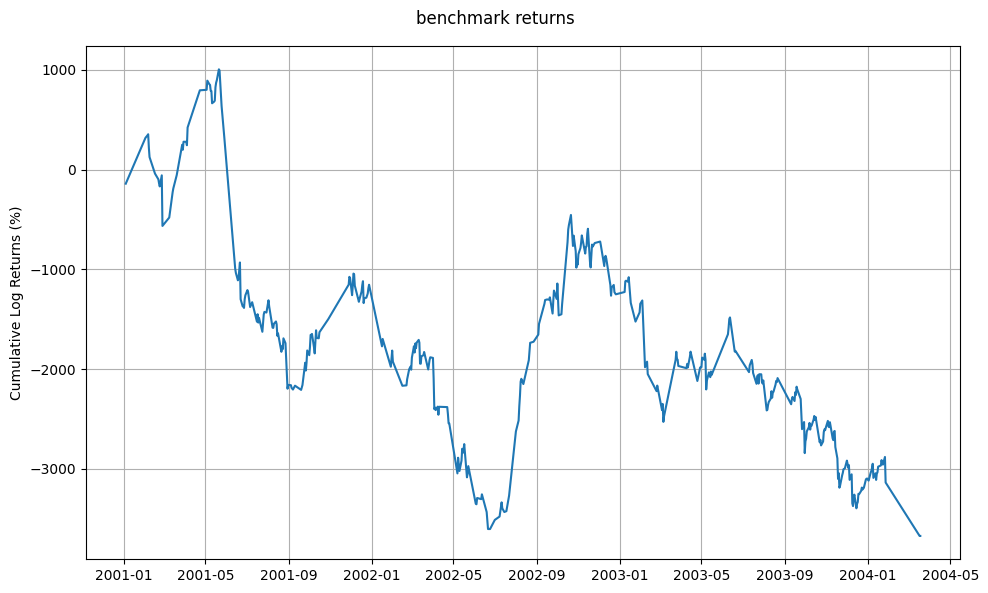

In [38]:
sfp.generate_returns_chart(bmk, "benchmark returns", log_scale=True)

In [39]:
start = dt.date(2005,1,1)
bmk = sfd.load_benchmark(start, end)
weights_by_date = bmk.group_by("date").agg(pl.col("weight").sum().alias("weight_sum"))


In [40]:
weights_by_date

date,weight_sum
date,f64
2019-07-16,1.0
2009-06-24,1.0
2007-05-03,1.0
2014-02-24,1.0
2014-11-13,1.0
…,…
2016-08-26,1.0
2006-08-08,1.0
2011-12-28,1.0


In [41]:
# sfd.load_benchmark_returns(start,end).select(pl.col("bmk_return"))
bmk_stats = sfd.load_benchmark_returns(start, end).select("bmk_return").describe()
bmk_stats


statistic,bmk_return
str,f64
"""count""",3775.0
"""null_count""",0.0
"""mean""",0.069091
"""std""",1.182289
"""min""",-9.009677
"""25%""",-0.381001
"""50%""",0.096273
"""75%""",0.582195
"""max""",11.877378


In [42]:
sfr.signal_stats(momentum)

mean,std,min,max,q25,q50,q75
f64,f64,f64,f64,f64,f64,f64
0.050917,0.403622,-5.06939,4.569856,-0.133831,0.079836,0.267134


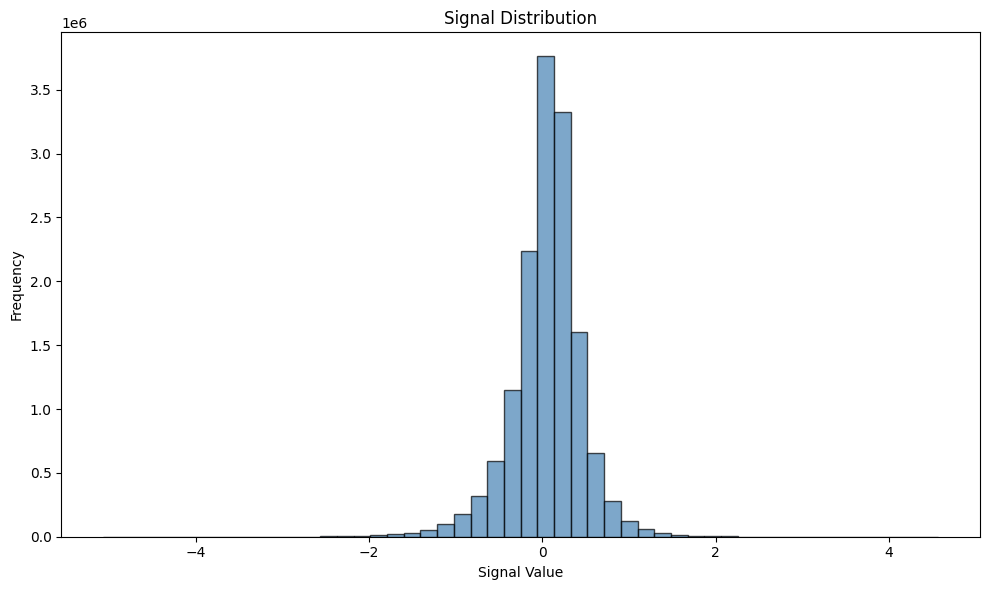

In [43]:
sfr.signal_distribution(momentum)